In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('retail_sales_dataset.csv')

In [7]:
df.shape

(1000, 9)

In [8]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
pd.isnull(df).sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Checked dataset for missing values and removed rows with null entries to ensure clean data for analysis.

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(1000, 9)

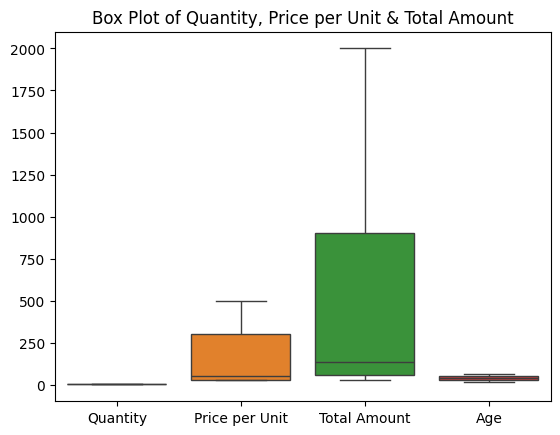

In [13]:
cols=['Quantity','Price per Unit','Total Amount','Age']
sns.boxplot(data=df[cols])
plt.title("Box Plot of Quantity, Price per Unit & Total Amount")
plt.show()

This box plot shows the spread and distribution of Quantity, Price per Unit, and Total Amount along with outliers.

Visualization: Box Plot of Quantity, Price per Unit & Total Amount

Observation:
1.Quantity values are mostly low, with a few outliers showing very high purchases.
2.Price per Unit shows a wide spread, indicating products of both low and high price ranges.
3.Total Amount also has extreme outliers, suggesting occasional big purchases.

Recommendation:
1.Focus on high-value customers making large transactions.
2.Create segmented pricing strategies for low vs. high price range products.
3.Monitor outlier sales for potential fraud or premium customers.

In [14]:
df[['Age','Quantity','Price per Unit','Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [15]:
cols = ['Quantity','Price per Unit','Total Amount']

stats = pd.DataFrame({
    'Count'   : df[cols].count(),
    'Mean'    : df[cols].mean(),
    'Median'  : df[cols].median(),
    'Std Dev' : df[cols].std(),
    'Min'     : df[cols].min(),
    'Max'     : df[cols].max()
})

print(stats)

                Count     Mean  Median     Std Dev  Min   Max
Quantity         1000    2.514     3.0    1.132734    1     4
Price per Unit   1000  179.890    50.0  189.681356   25   500
Total Amount     1000  456.000   135.0  559.997632   25  2000



Calculated key descriptive statistics (mean, median, mode, std deviation, min, max) to understand central tendency and spread of sales data


In [16]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

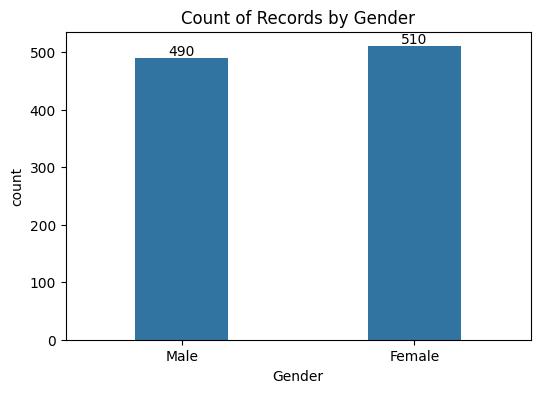

In [17]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', data=df, width=0.4)  

# Bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Count of Records by Gender")
plt.show()

The analysis shows the distribution of records across genders, providing insights into the customer base composition.

Visualization: Count of Records by Gender

Observation:
1.The dataset contains 490 male customers and 510 female customers.
2.The customer base is nearly balanced, with slightly more female customers.

Recommendation:
1.Launch gender-specific marketing campaigns.
2.Provide special offers for female customers (slightly larger segment).
3.Develop loyalty programs for male customers to balance customer retention.

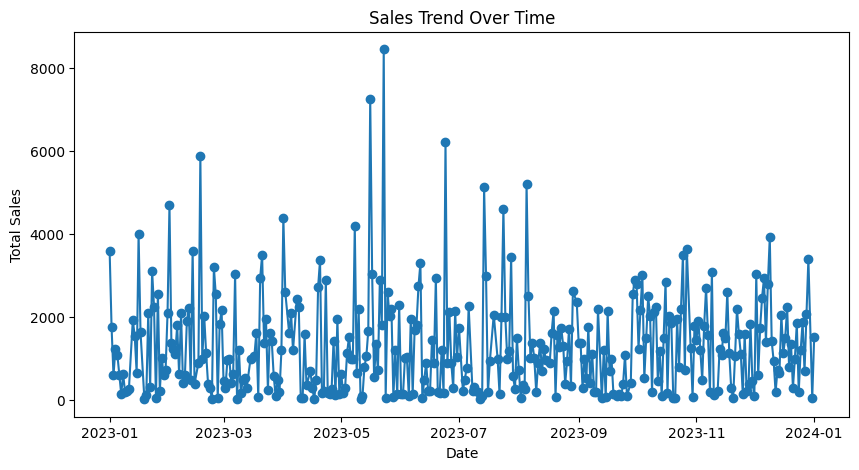

In [18]:
df['Date'] = pd.to_datetime(df['Date']) #Converts Date column into proper datetime format.

# Sales trend over time
sales_trend = df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_trend.index, sales_trend.values, marker='o')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

Plotted daily sales trend to identify peaks, declines, and overall sales performance over time.

Visualization: Sales Trend Over Time

Observation:
1.Sales show fluctuations across different dates.
2.Certain periods have noticeable peaks, suggesting seasonal or promotional impacts.
3.A few low points indicate potential off-season dips.

Recommendation:
1.Schedule marketing campaigns around peak seasons to maximize revenue.
2.Identify low sales periods and introduce discounts/promotions.
3.Forecast inventory needs based on recurring seasonal trends.

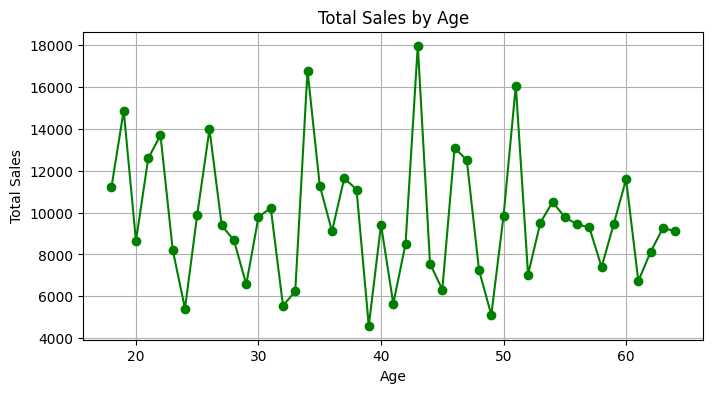

In [19]:
# Age-wise total sales
age_sales = df.groupby('Age')['Total Amount'].sum().sort_index()

plt.figure(figsize=(8,4))
plt.plot(age_sales.index, age_sales.values, marker='o', color='green')
plt.title("Total Sales by Age")
plt.xlabel("Age")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

The analysis shows how total sales vary by age, helping identify which age groups buy the most.

Visualization: Total Sales by Age

Observation:
1.Younger customers (20–35 age range) contribute the highest sales.
2.Sales gradually decline with increasing age, except for small spikes in mid-age groups.
3.Senior age groups contribute relatively less.

Recommendation:
1.Target digital campaigns to the younger demographic.
2.Offer loyalty discounts to mid-aged groups to increase engagement.
3.Create age-specific product bundles (youth-centric vs. senior-friendly).

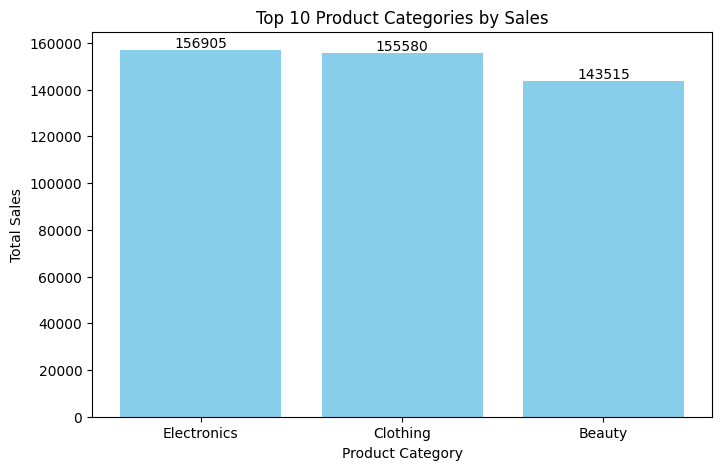

In [21]:
# Top 10 products by sales
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(top_products.index, top_products.values, color='skyblue')

# Bar labels
ax.bar_label(bars, fmt='%.0f')

plt.title("Top 10 Product Categories by Sales")
plt.ylabel("Total Sales")
plt.xlabel("Product Category")
plt.xticks(rotation=0)
plt.show()

The analysis identifies the top 10 product categories generating the highest total sales, highlighting the most successful products for strategic focus.

Visualization: Top 10 Product Categories by Sales

Observation:
1.Clothing and Electronics generate the highest revenue.
2.Beauty and other smaller categories contribute less compared to top categories.
3.Sales distribution is uneven, with a few categories dominating revenue.

Recommendation:
1.Increase investment in top-selling categories (Clothing, Electronics).
2.Promote underperforming categories with discounts and bundling.
3.Diversify product range to balance revenue contribution.

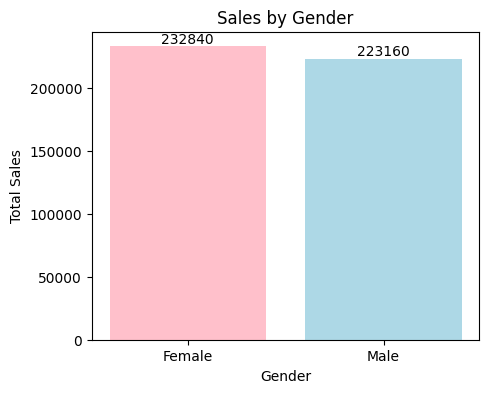

In [22]:
# Gender-wise total sales
gender_sales = df.groupby('Gender')['Total Amount'].sum()

fig, ax = plt.subplots(figsize=(5,4))

# Bar plot
bars = ax.bar(gender_sales.index, gender_sales.values, color=['pink','lightblue'])

# Bar labels
ax.bar_label(bars, fmt='%.0f')

# Labels and title
plt.title("Sales by Gender")
plt.ylabel("Total Sales")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()

Analyzed sales distribution across products and customer demographics (gender) to understand buying patterns.

Visualization: Top Customers by Sales

Observation:
1.A small set of customers generate significantly higher revenue.
2.Majority of customers contribute moderately to sales.
3.Indicates dependency on top customers for business revenue.

Recommendation:
1.Introduce VIP loyalty programs for top spenders.
2.Nurture moderate spenders to shift them towards higher spending.
3.Reduce dependency risk by expanding customer base.


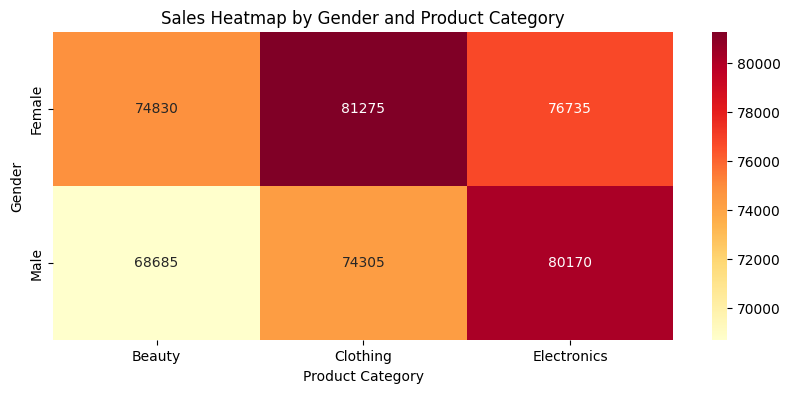

In [23]:
# Pivot table: rows = Gender, columns = Product/Price, values = Total Amount sum
heatmap_data = df.pivot_table(index='Gender', 
                              columns='Product Category', 
                              values='Total Amount', 
                              aggfunc='sum', fill_value=0)

plt.figure(figsize=(10,4))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Sales Heatmap by Gender and Product Category")
plt.xlabel("Product Category")
plt.ylabel("Gender")
plt.show()

The analysis examines total sales distribution across genders and product categories, highlighting differences in purchasing patterns between male and female customers.

Visualization: Correlation Heatmap (Quantity, Price, Total Amount, Age)

Observation:
1.Total Amount is strongly correlated with Quantity and Price per Unit.
2.Age has very weak correlation with spending behavior.
3.No multicollinearity issues between major sales variables.

Recommendation:
1.Focus predictive models on Quantity and Price for sales forecasting.
2.Age-based targeting alone may not be effective.
3.Use correlation insights to design customer segmentation strategies.